# Import données et librairies

In [1]:
#import librairies
import pandas as pd
import numpy as np

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import données
eval=pd.read_csv("extrait_eval.csv")
sirh=pd.read_csv("extrait_sirh.csv")
sondage=pd.read_csv('extrait_sondage.csv')

# Nettoyage Données

## Etude fichier eval

In [3]:
eval.head()

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %
3,4,3,1,3,3,3,E_5,3,Oui,11 %
4,1,3,1,2,4,3,E_7,3,Non,12 %


In [4]:
eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int64(7), object(3)
memory usage:

In [5]:
eval.describe()

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.721769,2.729932,2.063946,2.728571,2.712245,2.761224,3.153741
std,1.093082,0.711561,1.106940,1.102846,1.081209,0.706476,0.360824
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000
max,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000


In [6]:
eval['satisfaction_employee_environnement'].value_counts()

satisfaction_employee_environnement
3    453
4    446
2    287
1    284
Name: count, dtype: int64

In [7]:
eval['note_evaluation_precedente'].value_counts()

note_evaluation_precedente
3    868
2    375
4    144
1     83
Name: count, dtype: int64

In [8]:
eval['niveau_hierarchique_poste'].value_counts()

niveau_hierarchique_poste
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [9]:
eval['satisfaction_employee_nature_travail'].value_counts()

satisfaction_employee_nature_travail
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [10]:
eval['satisfaction_employee_equipe'].value_counts()

satisfaction_employee_equipe
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [11]:
eval['satisfaction_employee_equilibre_pro_perso'].value_counts()

satisfaction_employee_equilibre_pro_perso
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [12]:
eval['note_evaluation_actuelle'].value_counts()

note_evaluation_actuelle
3    1244
4     226
Name: count, dtype: int64

In [13]:
eval['heure_supplementaires'].value_counts()

heure_supplementaires
Non    1054
Oui     416
Name: count, dtype: int64

Les données de ce fichier semblent propres. une note sur 5 (niveau hiérarchique) et des notes sur 4. Avec un booléen pour les heures supplémentaires et un pourcentage pour l'augmentation de salaire. 
A noter, la note évaluation actuelle est soit 4 soit 3: on pourra simplifier en variable binaire.

## Etude fichier sirh

In [14]:
sirh.head()

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2


In [15]:
sirh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+ KB


In [16]:
sirh['genre'].value_counts()

genre
M    882
F    588
Name: count, dtype: int64

In [17]:
sirh['statut_marital'].value_counts()

statut_marital
Marié(e)       673
Célibataire    470
Divorcé(e)     327
Name: count, dtype: int64

Pas de non-binaire ou et seulement 3 statuts maritaux

## Etude fichier sondage

In [18]:
sondage.head()

,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2


In [20]:
sondage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous_responsable_actuel        1470 n

on voit qu'on pourra encoder certaines features par des variables binaires('a_quitte_l_entreprise','ayant_enfants'), ordinales ('frequence_deplacement') ou non-ordinales ('domaine_etude')

# Jointures

In [29]:
sondage=sondage.rename(columns={'code_sondage':'id_employee'})

In [31]:
data=pd.merge(sirh, sondage,on='id_employee')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id_employee                          1470 non-null   int64 
 1   age                                  1470 non-null   int64 
 2   genre                                1470 non-null   object
 3   revenu_mensuel                       1470 non-null   int64 
 4   statut_marital                       1470 non-null   object
 5   departement                          1470 non-null   object
 6   poste                                1470 non-null   object
 7   nombre_experiences_precedentes       1470 non-null   int64 
 8   nombre_heures_travailless            1470 non-null   int64 
 9   annee_experience_totale              1470 non-null   int64 
 10  annees_dans_l_entreprise             1470 non-null   int64 
 11  annees_dans_le_poste_actuel          1470 n

In [34]:
eval['eval_number'] = eval['eval_number'].str.replace('E_', '', regex=False).astype(int)

0    1
1    2
2    4
3    5
4    7
Name: eval_number, dtype: int64


In [36]:
eval=eval.rename(columns={'eval_number':'id_employee'})

In [38]:
data=pd.merge(data, eval,on='id_employee')

In [39]:
data

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,...,annes_sous_responsable_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,...,5,2,3,2,4,1,1,3,Oui,11 %
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,...,7,3,2,2,2,4,3,4,Non,23 %
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,...,0,4,2,1,3,2,3,3,Oui,15 %
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,...,0,4,3,1,3,3,3,3,Oui,11 %
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,...,2,1,3,1,2,4,3,3,Non,12 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,M,2571,Marié(e),Consulting,Consultant,4,80,17,...,3,3,4,2,4,3,3,3,Non,17 %
1466,2062,39,M,9991,Marié(e),Consulting,Manager,4,80,9,...,7,4,2,3,1,1,3,3,Non,15 %
1467,2064,27,M,6142,Marié(e),Consulting,Tech Lead,1,80,6,...,3,2,4,2,2,2,3,4,Oui,20 %
1468,2065,49,M,5390,Marié(e),Commercial,Cadre Commercial,2,80,17,...,8,4,2,2,2,4,2,3,Non,14 %


# Analyse exploratoire

In [21]:
eval.describe()

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.721769,2.729932,2.063946,2.728571,2.712245,2.761224,3.153741
std,1.093082,0.711561,1.106940,1.102846,1.081209,0.706476,0.360824
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000
max,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000


In [25]:
eval_num=eval[['satisfaction_employee_environnement','note_evaluation_precedente','niveau_hierarchique_poste','satisfaction_employee_nature_travail','satisfaction_employee_equipe','satisfaction_employee_equilibre_pro_perso','note_evaluation_actuelle']]

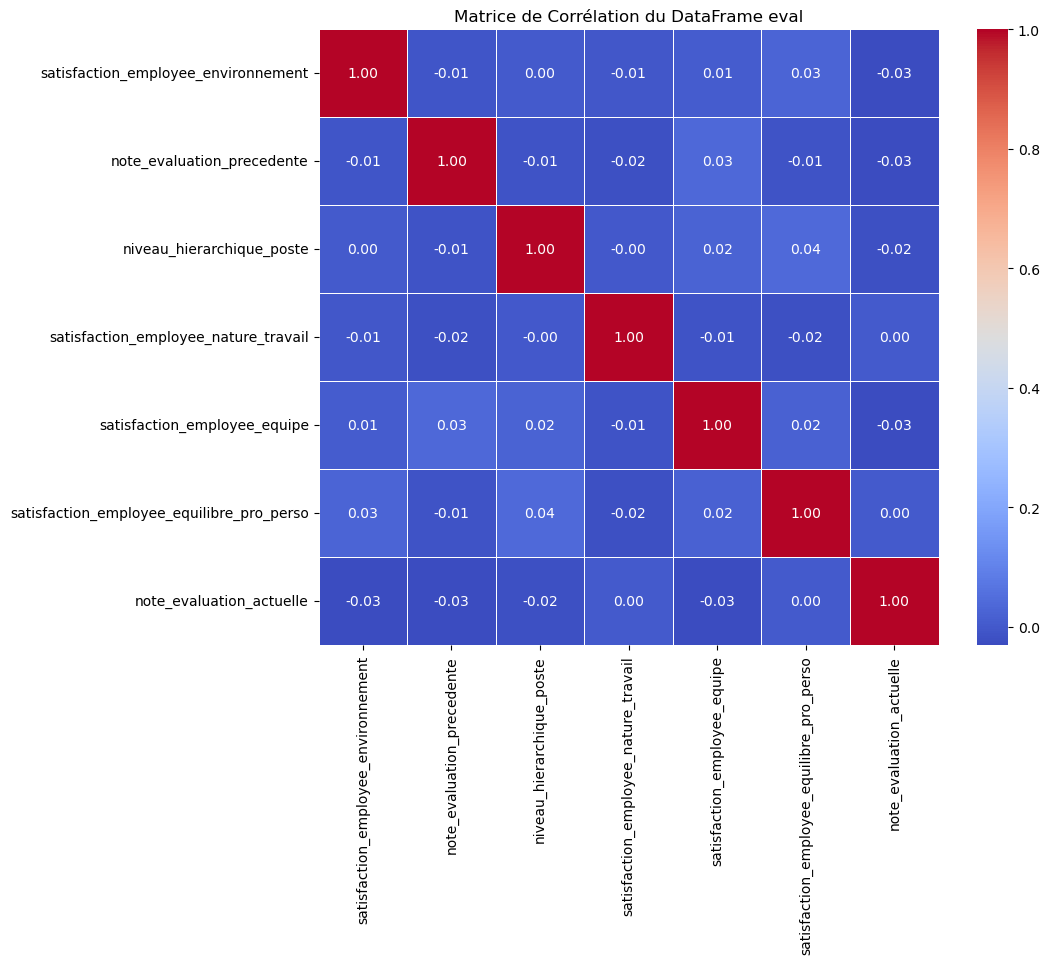

In [27]:
# Calcul de la corrélation
correlation_matrix = eval_num.corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Titre
plt.title('Matrice de Corrélation du DataFrame eval')
plt.show()

C:\Users\15GIRAV\AppData\Local\Temp\ipykernel_1476\2962496159.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=eval[col], data=eval, palette='viridis')
C:\Users\15GIRAV\AppData\Local\Temp\ipykernel_1476\2962496159.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=eval[col], data=eval, palette='viridis')


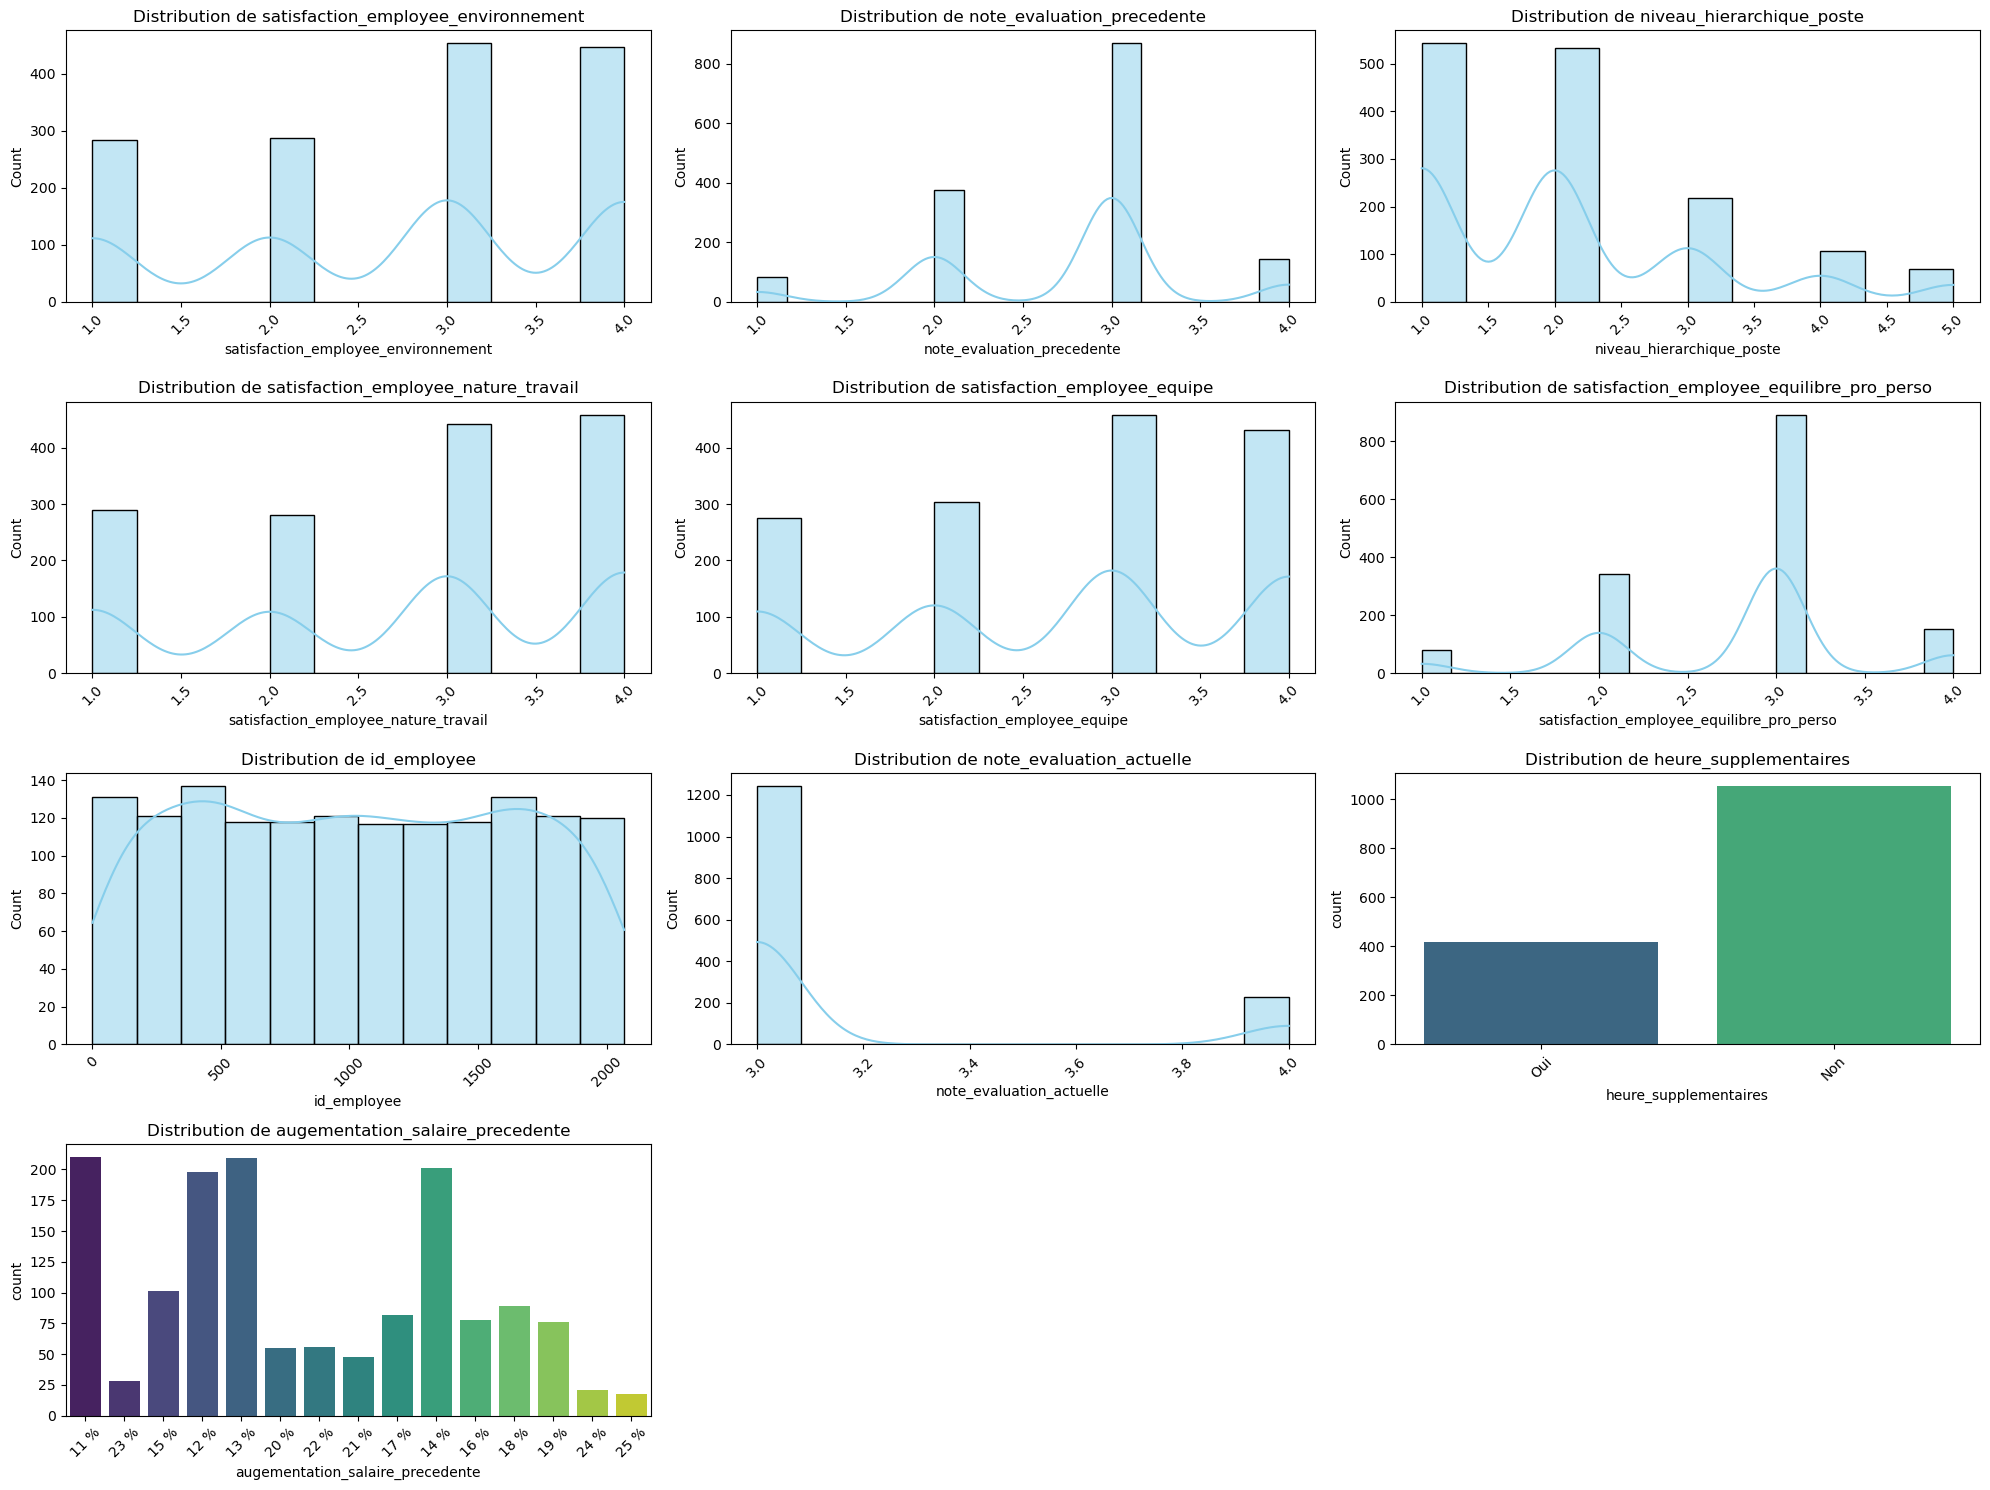

In [48]:
# On définit la liste des colonnes à tracer
cols = eval.columns

# Création de la figure (on adapte la taille selon le nombre de colonnes)
plt.figure(figsize=(20, 15))

for i, col in enumerate(cols):
    plt.subplot(4, 3, i + 1) # Création d'une grille de 4 lignes et 3 colonnes
    
    # Si la colonne est numérique, on fait un histogramme classique
    if eval[col].dtype in ['int64', 'float64']:
        sns.histplot(eval[col], kde=True, color='skyblue')
    # Si c'est un objet (catégorielle), on utilise un countplot
    else:
        sns.countplot(x=eval[col], data=eval, palette='viridis')
        
    plt.title(f'Distribution de {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\15GIRAV\AppData\Local\Temp\ipykernel_1476\260381942.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sondage[col], data=sondage, palette='viridis')
C:\Users\15GIRAV\AppData\Local\Temp\ipykernel_1476\260381942.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sondage[col], data=sondage, palette='viridis')
C:\Users\15GIRAV\AppData\Local\Temp\ipykernel_1476\260381942.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sondage[col], data=sondage, palette='viridis')
C:\Users\15GIRAV\AppData\Local\Temp\ipykernel_1476\2

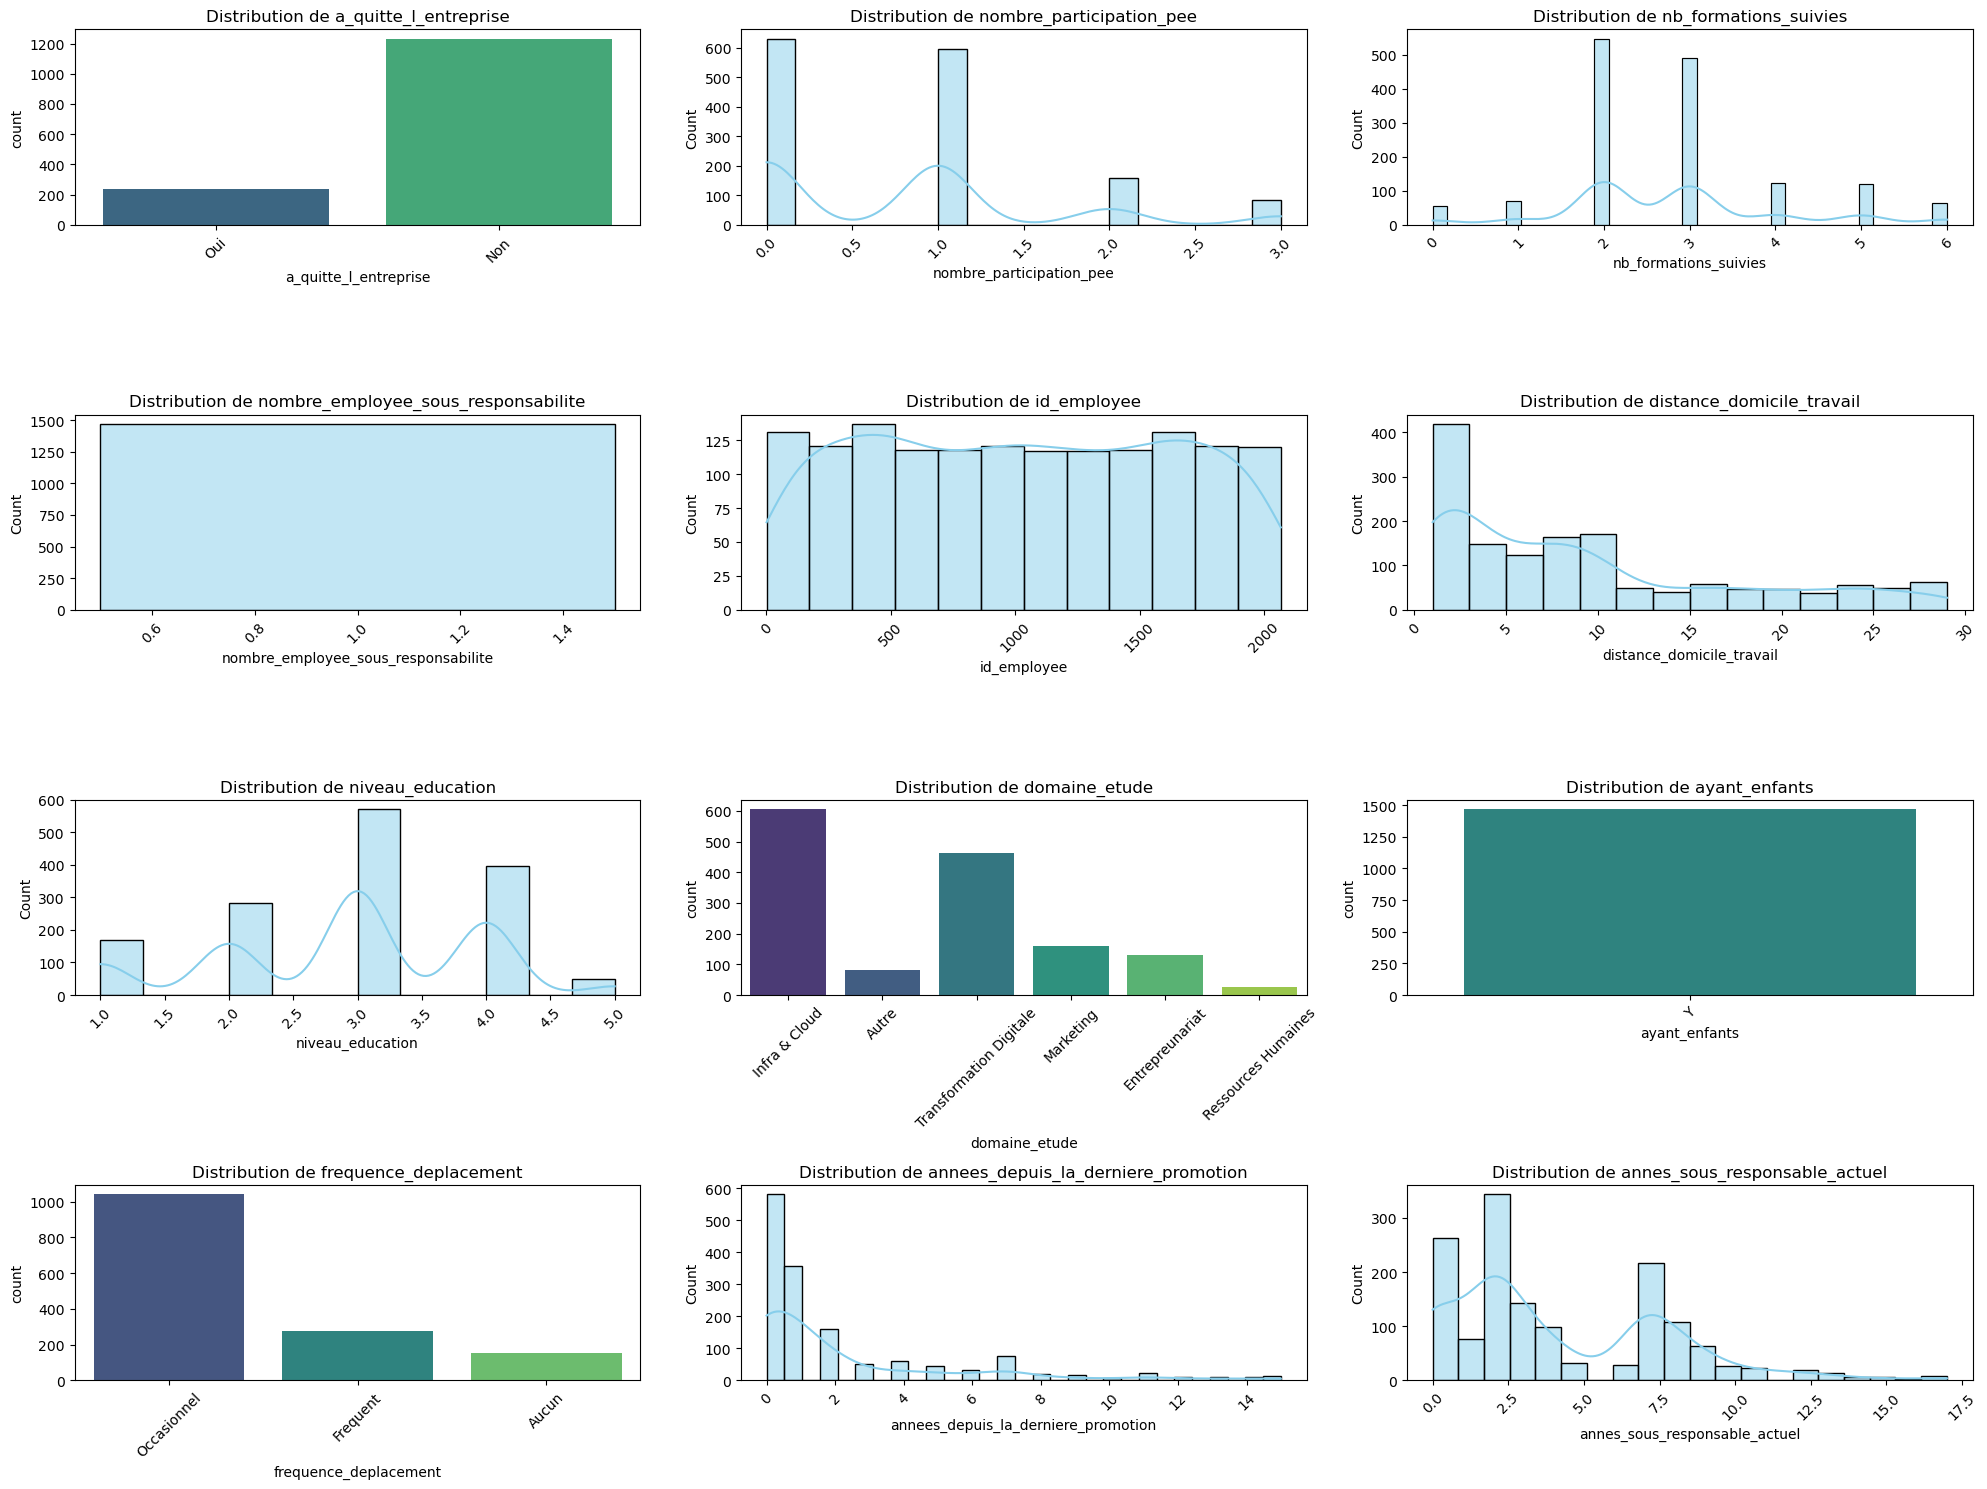

In [49]:
# On définit la liste des colonnes à tracer
cols = sondage.columns

# Création de la figure (on adapte la taille selon le nombre de colonnes)
plt.figure(figsize=(20, 15))

for i, col in enumerate(cols):
    plt.subplot(4, 3, i + 1) # Création d'une grille de 4 lignes et 3 colonnes
    
    # Si la colonne est numérique, on fait un histogramme classique
    if sondage[col].dtype in ['int64', 'float64']:
        sns.histplot(sondage[col], kde=True, color='skyblue')
    # Si c'est un objet (catégorielle), on utilise un countplot
    else:
        sns.countplot(x=sondage[col], data=sondage, palette='viridis')
        
    plt.title(f'Distribution de {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\15GIRAV\AppData\Local\Temp\ipykernel_1476\1826031885.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sirh[col], data=sirh, palette='viridis')
C:\Users\15GIRAV\AppData\Local\Temp\ipykernel_1476\1826031885.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sirh[col], data=sirh, palette='viridis')
C:\Users\15GIRAV\AppData\Local\Temp\ipykernel_1476\1826031885.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sirh[col], data=sirh, palette='viridis')
C:\Users\15GIRAV\AppData\Local\Temp\ipykernel_1476\1826031885.py:15

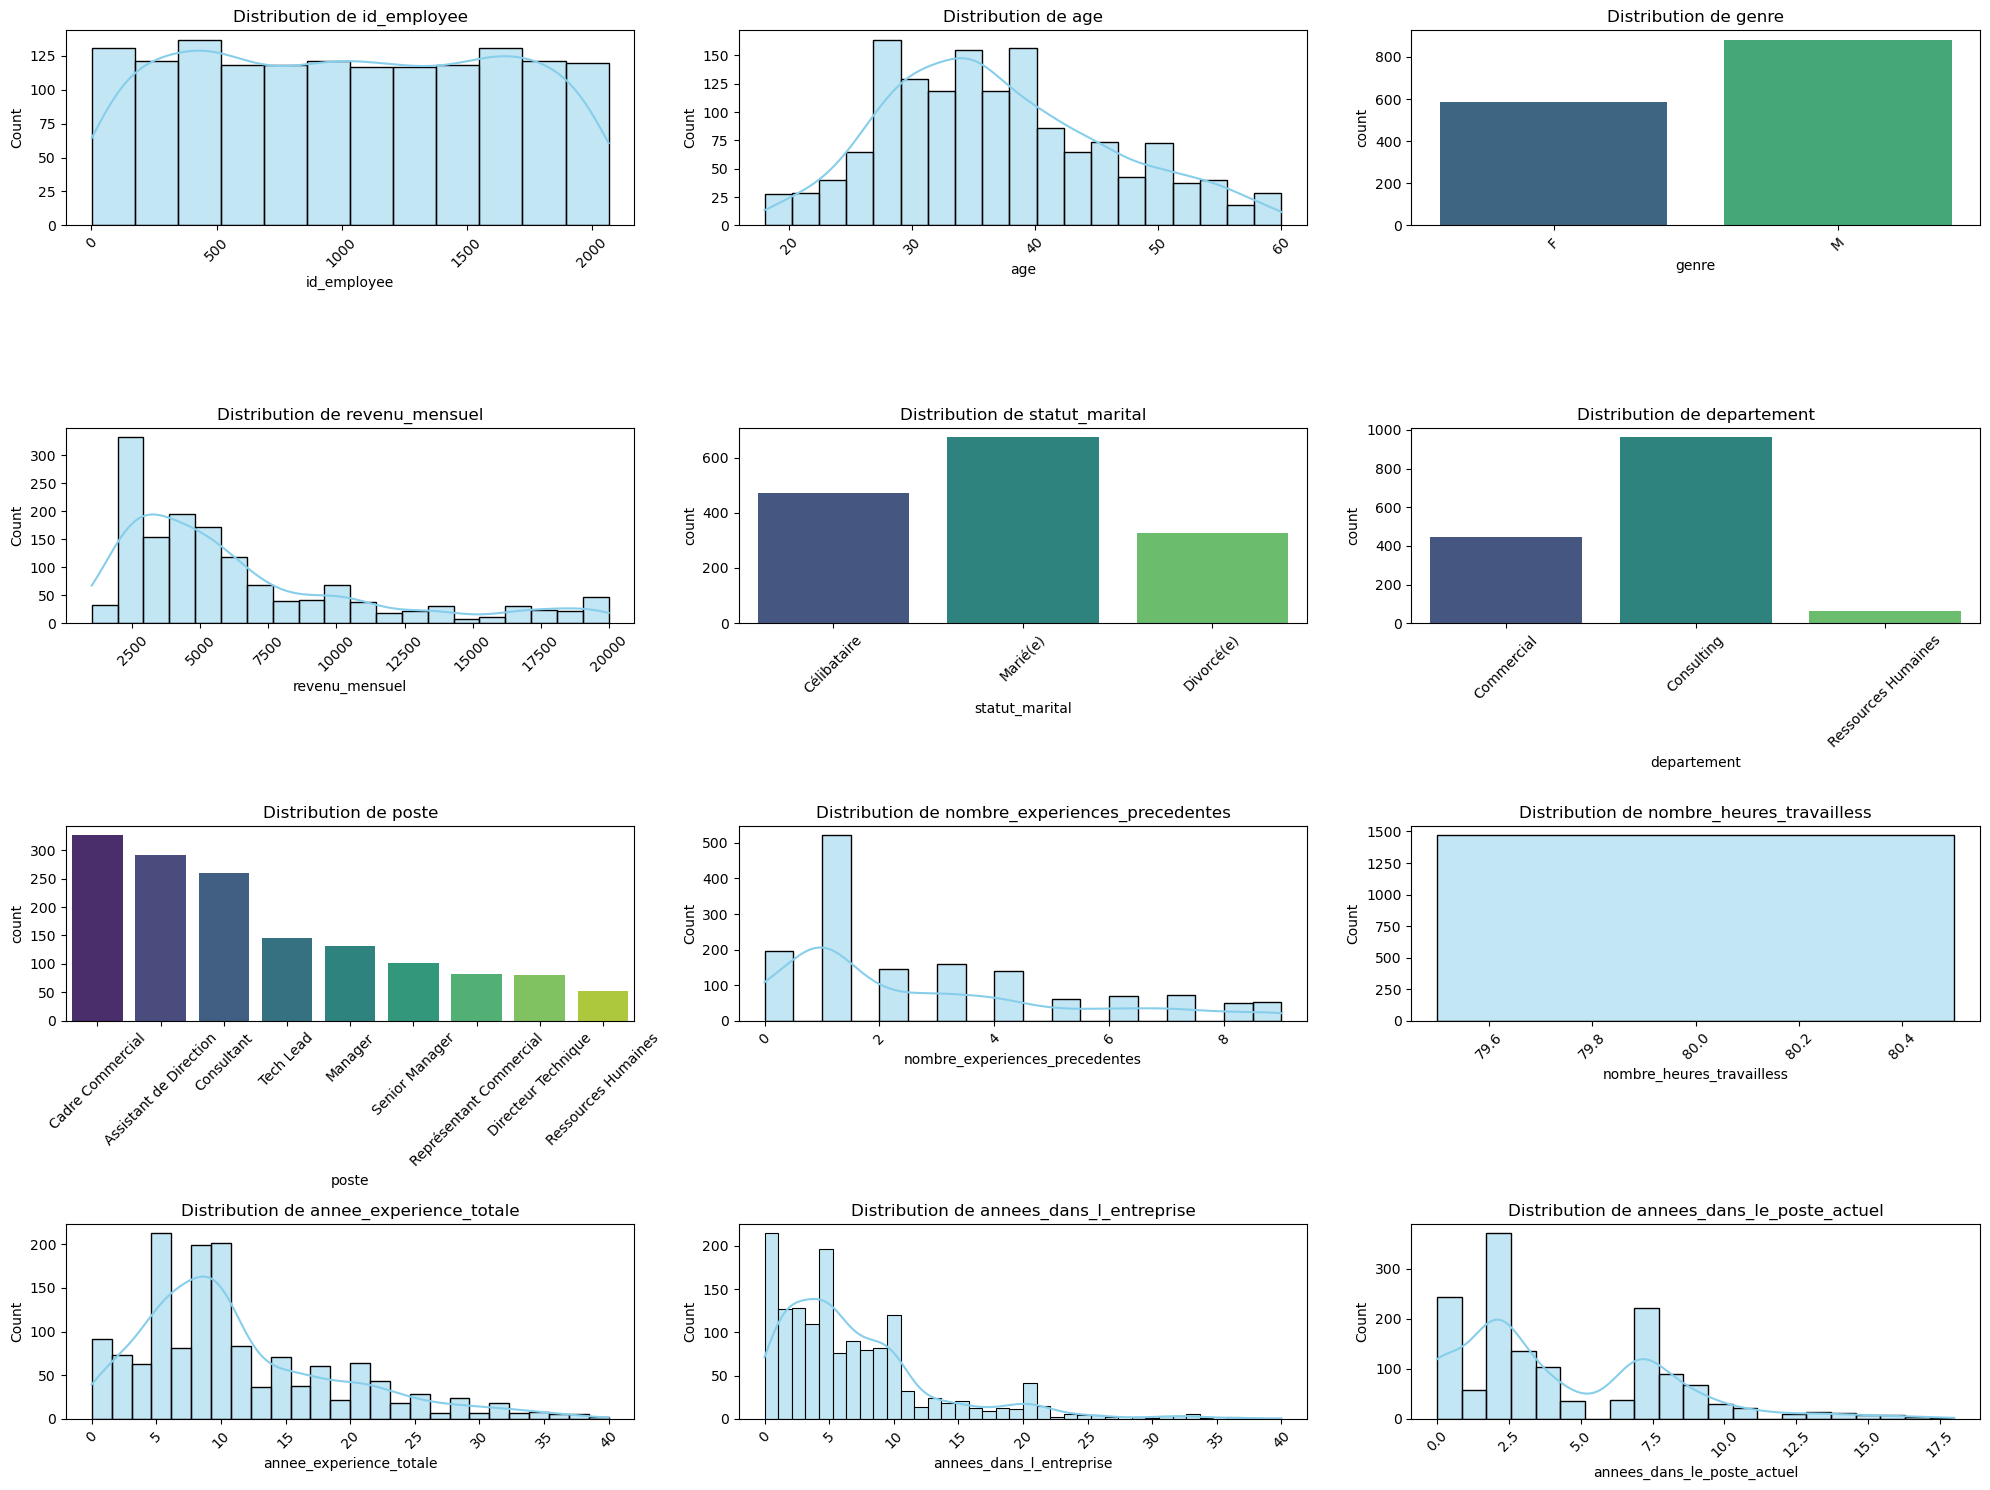

In [50]:
# On définit la liste des colonnes à tracer
cols = sirh.columns

# Création de la figure (on adapte la taille selon le nombre de colonnes)
plt.figure(figsize=(20, 15))

for i, col in enumerate(cols):
    plt.subplot(4, 3, i + 1) # Création d'une grille de 4 lignes et 3 colonnes
    
    # Si la colonne est numérique, on fait un histogramme classique
    if sirh[col].dtype in ['int64', 'float64']:
        sns.histplot(sirh[col], kde=True, color='skyblue')
    # Si c'est un objet (catégorielle), on utilise un countplot
    else:
        sns.countplot(x=sirh[col], data=sirh, palette='viridis')
        
    plt.title(f'Distribution de {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()